In [1]:
#riss
#www.riss.kr

텍스트 빈도 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import re  #정규표현식

from functools import reduce #2차원 >> 1차원

from nltk.tokenize import word_tokenize # word >> token
from nltk.corpus import stopwords  #stopwords >> 불용어
from nltk.stem import WordNetLemmatizer # 어간 분석

from collections import Counter

from wordcloud import STOPWORDS, WordCloud

In [14]:
import nltk
!pip install xlrd


   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 791.7 kB/s eta 0:00:00


데이터 준비

In [11]:
#파일 병합
all_files = \
glob.glob('./8장_data/myCabinetExcelData*.xls')

In [12]:
all_files

['./8장_data\\myCabinetExcelData (1).xls',
 './8장_data\\myCabinetExcelData (2).xls',
 './8장_data\\myCabinetExcelData (3).xls',
 './8장_data\\myCabinetExcelData (4).xls',
 './8장_data\\myCabinetExcelData (5).xls',
 './8장_data\\myCabinetExcelData (6).xls',
 './8장_data\\myCabinetExcelData (7).xls',
 './8장_data\\myCabinetExcelData (8).xls',
 './8장_data\\myCabinetExcelData (9).xls',
 './8장_data\\myCabinetExcelData.xls']

In [15]:
all_files_data = []
#저장할 빈 리스트

for file in all_files:
    df = pd.read_excel(file)
    all_files_data.append(df)

all_files_data[0] # 내용확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Smart city big data analytics: An advanced review,"Soomro, Kamran; Bhutta, Muhammad Nasir Mumtaz;...",John Wiley & Sons Ltd,2019
96,NaN,97,A watchdog approach - name-matching algorithm ...,"Kirubakaran, Anusuya; Aramudhan, M.",Inderscience,2018
97,NaN,98,An intelligent approach to Big Data analytics ...,"Verma, Neha; Singh, Jatinder",Emerald Group Publishing Limited,2017
98,NaN,99,How organisations leverage Big Data: a maturit...,"Comuzzi, Marco; Patel, Anit",Emerald Group Publishing Limited,2016


In [16]:
all_file = pd.concat(all_files_data, axis=0, ignore_index=True)
all_file.head(3)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [18]:
all_file.to_csv('./8장_data/riss_bigdata.csv', encoding='utf-8', index=False)

데이터 전처리

In [19]:
#제목 추출

all_file.head(3)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [20]:
all_file.shape

(1000, 6)

In [21]:
all_file['제목']

0      Guest Editorial: Big Media Data: Understanding...
1      Guest Editorial: Big Scholar Data Discovery an...
2        Guest Editorial: Big Data Analytics and the Web
3      Parallel computing for preserving privacy usin...
4                           NoSQL databases for big data
                             ...                        
995    Guest Editorial: Big Media Data: Understanding...
996    Guest Editorial: Big Scholar Data Discovery an...
997    Guest Editorial: Big Media Data: Understanding...
998    Speed Up Big Data Analytics by Unveiling the S...
999          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [22]:
all_title = all_file['제목']
all_title.head(3)

0    Guest Editorial: Big Media Data: Understanding...
1    Guest Editorial: Big Scholar Data Discovery an...
2      Guest Editorial: Big Data Analytics and the Web
Name: 제목, dtype: object

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
stopWords = set(stopwords.words('english'))

In [26]:
lemma = WordNetLemmatizer()

In [27]:
nltk.download('punkt') #구두점 .?!

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Master\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
words = []

for title in all_title:
    en_words = re.sub(r"[^a-zA-Z]+"," ",str(title)) #정규표현식 사용, 영문 대소문자 ^ 제외한 문자를 공백 (" ")변경
    en_words_token = word_tokenize(en_words.lower()) # 변환 된 단어를 토큰화
    en_words_stop = [word for word in en_words_token if not word in stopWords] # 불용어 제거
    en_words_lemma = [lemma.lemmatize(word) for word in en_words_stop]  #어간 추출
    words.append(en_words_lemma)


In [30]:
#2차원 >> 1차원

word_list = list(reduce(lambda x, y: x+y, words))
word_list

['guest',
 'editorial',
 'big',
 'medium',
 'data',
 'understanding',
 'search',
 'mining',
 'part',
 'guest',
 'editorial',
 'big',
 'scholar',
 'data',
 'discovery',
 'collaboration',
 'guest',
 'editorial',
 'big',
 'data',
 'analytics',
 'web',
 'parallel',
 'computing',
 'preserving',
 'privacy',
 'using',
 'k',
 'anonymisation',
 'algorithm',
 'big',
 'data',
 'nosql',
 'database',
 'big',
 'data',
 'computation',
 'migration',
 'new',
 'approach',
 'execute',
 'big',
 'data',
 'bioinformatics',
 'workflow',
 'towards',
 'real',
 'time',
 'big',
 'data',
 'analytics',
 'platform',
 'health',
 'application',
 'new',
 'approach',
 'accurate',
 'distributed',
 'cluster',
 'analysis',
 'big',
 'data',
 'competitive',
 'k',
 'mean',
 'five',
 'layer',
 'architecture',
 'big',
 'data',
 'processing',
 'analytics',
 'towards',
 'max',
 'min',
 'fair',
 'resource',
 'allocation',
 'stream',
 'big',
 'data',
 'analytics',
 'shared',
 'cloud',
 'large',
 'scale',
 'spectral',
 'clustering'

데이터 탐색(EDA)

In [31]:
#단어 빈도 탐색

count = Counter(word_list)
count

Counter({'data': 1645,
         'big': 1354,
         'analytics': 137,
         'analysis': 67,
         'based': 62,
         'using': 57,
         'system': 50,
         'science': 50,
         'management': 48,
         'challenge': 47,
         'approach': 44,
         'mining': 40,
         'new': 38,
         'research': 38,
         'health': 37,
         'model': 37,
         'cloud': 34,
         'smart': 34,
         'learning': 33,
         'opportunity': 31,
         'processing': 30,
         'technology': 28,
         'small': 27,
         'framework': 26,
         'information': 26,
         'computing': 25,
         'application': 25,
         'driven': 24,
         'social': 24,
         'issue': 24,
         'quality': 23,
         'network': 23,
         'deal': 23,
         'knowledge': 22,
         'efficient': 22,
         'review': 22,
         'use': 22,
         'era': 22,
         'healthcare': 21,
         'storage': 21,
         'service': 21,
         'per

In [32]:
#가장 많이 나오는 단어
count.most_common(10)

[('data', 1645),
 ('big', 1354),
 ('analytics', 137),
 ('analysis', 67),
 ('based', 62),
 ('using', 57),
 ('system', 50),
 ('science', 50),
 ('management', 48),
 ('challenge', 47)]

In [33]:
word_count = dict()

for tag, counts in count.most_common(50):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print("%s : %d " % (tag, counts))

data : 1645 
big : 1354 
analytics : 137 
analysis : 67 
based : 62 
using : 57 
system : 50 
science : 50 
management : 48 
challenge : 47 
approach : 44 
mining : 40 
new : 38 
research : 38 
health : 37 
model : 37 
cloud : 34 
smart : 34 
learning : 33 
opportunity : 31 
processing : 30 
technology : 28 
small : 27 
framework : 26 
information : 26 
computing : 25 
application : 25 
driven : 24 
social : 24 
issue : 24 
quality : 23 
network : 23 
deal : 23 
knowledge : 22 
efficient : 22 
review : 22 
use : 22 
era : 22 
healthcare : 21 
storage : 21 
service : 21 
perspective : 21 
open : 20 
platform : 19 
survey : 19 
making : 19 
process : 19 
distributed : 18 
large : 18 
environment : 18 


In [34]:
# 검색어로 사용한 'big','data' 토큰 제거

del word_count['big']
del word_count['data']

In [35]:
word_count

{'analytics': 137,
 'analysis': 67,
 'based': 62,
 'using': 57,
 'system': 50,
 'science': 50,
 'management': 48,
 'challenge': 47,
 'approach': 44,
 'mining': 40,
 'new': 38,
 'research': 38,
 'health': 37,
 'model': 37,
 'cloud': 34,
 'smart': 34,
 'learning': 33,
 'opportunity': 31,
 'processing': 30,
 'technology': 28,
 'small': 27,
 'framework': 26,
 'information': 26,
 'computing': 25,
 'application': 25,
 'driven': 24,
 'social': 24,
 'issue': 24,
 'quality': 23,
 'network': 23,
 'deal': 23,
 'knowledge': 22,
 'efficient': 22,
 'review': 22,
 'use': 22,
 'era': 22,
 'healthcare': 21,
 'storage': 21,
 'service': 21,
 'perspective': 21,
 'open': 20,
 'platform': 19,
 'survey': 19,
 'making': 19,
 'process': 19,
 'distributed': 18,
 'large': 18,
 'environment': 18}

In [36]:
range(len(word_count))

range(0, 48)

데이터 시각화

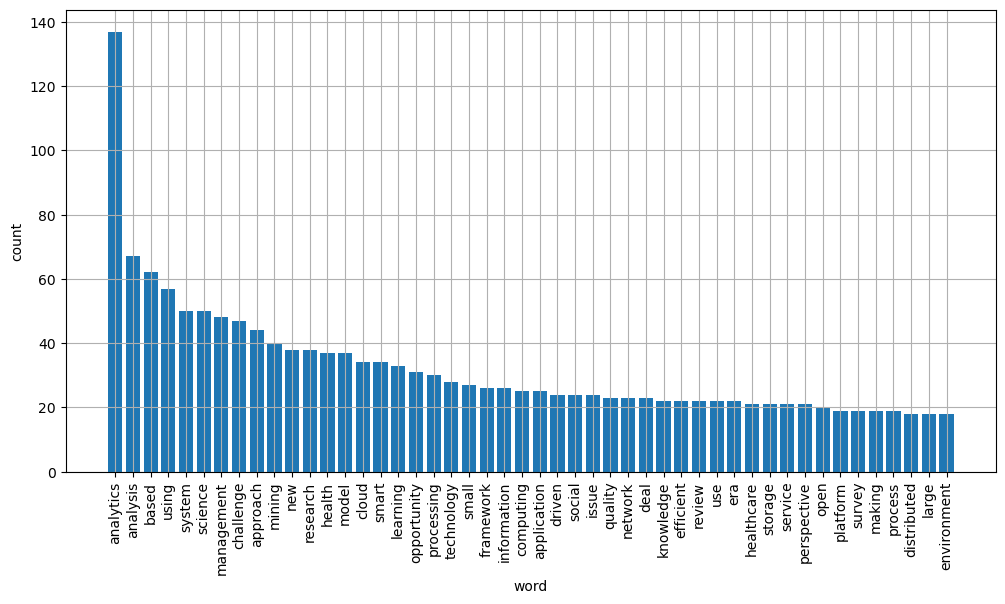

In [37]:
#단어 빈도 히스토그램

#그림판 제작
plt.figure(figsize = (12,6))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

sorted_key = sorted(word_count, key=word_count.get, reverse=True) # 내림차순
sorted_value = sorted(word_count.values(), reverse=True)

# print(sorted_key)
# print(sorted_value)


plt.bar(sorted_key, sorted_value, align='center') # 가운데 정렬
plt.xticks(range(len(word_count)), list(sorted_key), rotation=90)
plt.show()

분석 모델 구축 및 결과 시각화

In [38]:
#연도별 데이터 수

#doc_count 새 열 생성
all_file.head(3)

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016


In [39]:
all_file['doc_count'] = 0
del all_file['Unnamed: 0']

In [40]:
all_file.head(3)


,번호,제목,저자,출판사,출판일,doc_count
0,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015,0
1,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016,0
2,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016,0


In [41]:
all_file.groupby('출판일')['doc_count'].count()

출판일
1994      1
1995      1
1996      1
1998      3
2002      4
2003      1
2004      3
2005      3
2007      2
2008      3
2009      2
2010      3
2011      8
2012     34
2013     87
2014    154
2015    114
2016    139
2017    158
2018    130
2019    106
2020     43
Name: doc_count, dtype: int64

출판일별 논문 개수

In [42]:
all_file.groupby('출판일', as_index=False)['doc_count'].count() # 인덱스 새로 생성 출판일, doc_count 컬럼으로

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


In [43]:
summary_year = all_file.groupby('출판일', as_index=False)['doc_count'].count()

In [44]:
summary_year

,출판일,doc_count
0,1994,1
1,1995,1
2,1996,1
3,1998,3
4,2002,4
5,2003,1
6,2004,3
7,2005,3
8,2007,2
9,2008,3


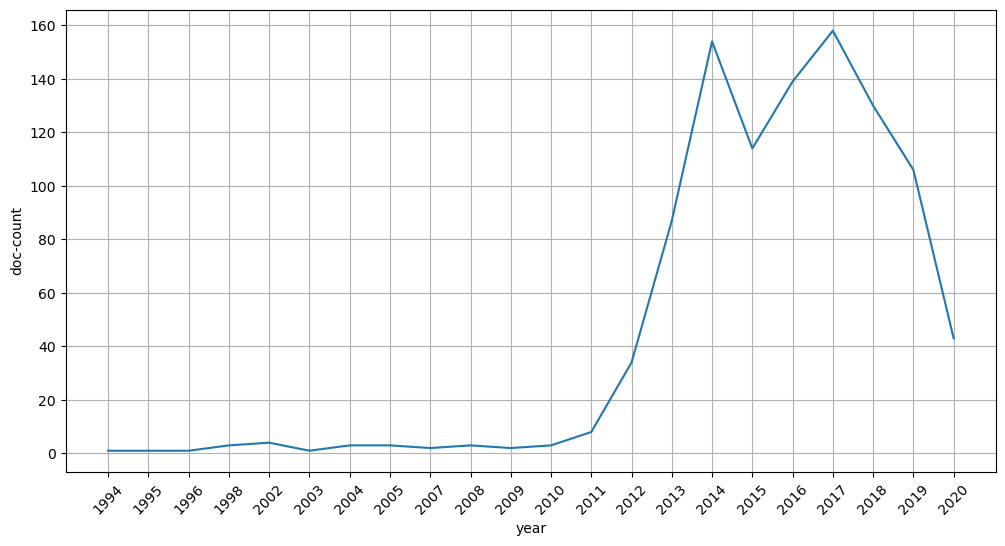

In [45]:
plt.figure(figsize = (12, 6))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)

plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']], rotation=45)
plt.show()

워드클라우드

In [46]:
stopwords = set(STOPWORDS) #불용어
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

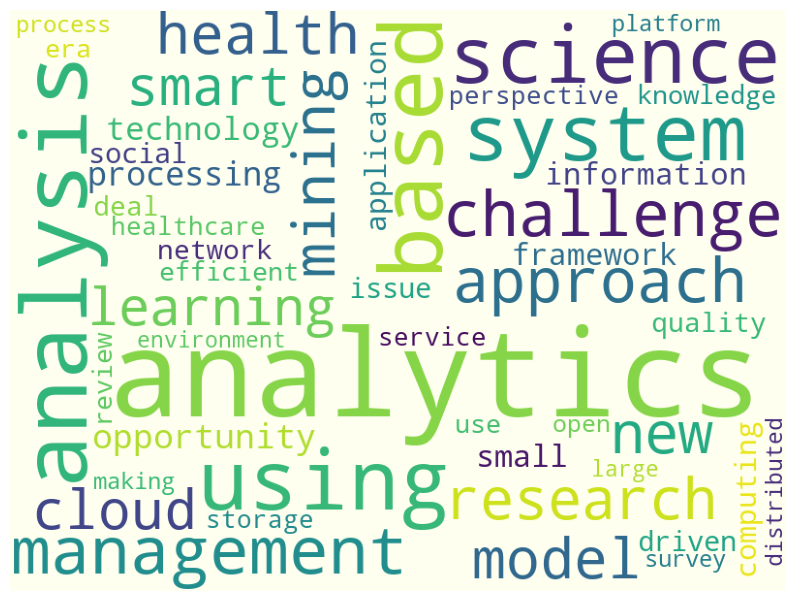

In [47]:
import wordcloud
from wordcloud import STOPWORDS, WordCloud

wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (10,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [48]:
cloud.to_file('./8장_data/riss_bigdata_wc.jpg')